In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mitsuba
from utils import SOUND_SPEED, LIGHT_SPEED, fractionalOctaves

In [2]:
mitsuba.set_variant("scalar_acoustic")

In [3]:
from mitsuba.core import IrregularContinuousDistribution

In [4]:
octave_freq = np.array([8, 16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000])
octave_wav = SOUND_SPEED / octave_freq

d = IrregularContinuousDistribution(octave_freq, octave_wav / np.sum(octave_wav))

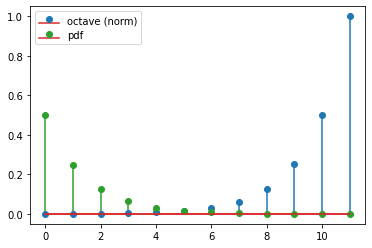

In [5]:
plt.stem(octave_freq / np.max(octave_freq), linefmt= 'C0-', markerfmt = 'C0o', label = 'octave (norm)')
plt.stem(d.pdf(), linefmt= 'C2-', markerfmt = 'C2o', label= 'pdf')
plt.legend()

In [203]:
def plot_bin_hist(values, n_bins):
    
    unique, counts = np.unique(values, return_counts=True)
    
    counts_padded = np.zeros(shape=(n_bins))
    unique_padded = np.arange(0, n_bins)
    counts_padded[unique] = counts
    
    print(dict(zip(unique_padded, counts_padded)))
    plt.bar(unique_padded, counts_padded)
    
def fractionalOctaveBin(f_high, f):
    #return np.argmax(f_high > f, axis=1)
    return np.digitize(f, f_high) #np.searchsorted(f_high, f, side='right')

def logbin(mini, maxi, n_bins, x, log=np.log):    
    
    return np.clip(np.floor((n_bins) * (log(x / mini) / log(maxi / mini))).astype(int), 0, n_bins -1)

In [7]:
uniform_samples = np.random.uniform(0, 1, 10000)

distribution_samples = np.array([d.sample(x) for x in uniform_samples])

bins = logbin(octave_freq.min(), octave_freq.max(), 10, distribution_samples)

{0: 1016.0, 1: 957.0, 2: 971.0, 3: 1024.0, 4: 1017.0, 5: 1027.0, 6: 1021.0, 7: 1005.0, 8: 1009.0, 9: 953.0}


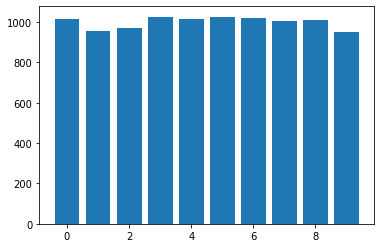

In [8]:
plot_bin_hist(bins, 10)

In [9]:
center, low, high, _ = fractionalOctaves(1)

all_freq = np.concatenate((low, center, high))
all_freq = np.unique(np.sort(all_freq.round(decimals=10)))

all_wav = np.flip(SOUND_SPEED / all_freq)
all_freq = np.flip(all_freq)
print(all_freq)

[22387.21138568 15848.93192461 11220.18454302  7943.28234724
  5623.4132519   3981.07170554  2818.38293126  1995.26231497
  1412.53754462  1000.           707.94578438   501.18723363
   354.81338923   251.18864315   177.827941     125.89254118
    89.12509381    63.09573445    44.66835922    31.6227766
    22.38721139]


In [10]:
d = IrregularContinuousDistribution(all_wav, all_freq)

In [192]:
uniform_samples = np.random.uniform(0, 1, 10000)

distribution_samples = np.array([d.sample(x) for x in uniform_samples])

bins = logbin(all_freq_wav.min(), all_freq_wav.max(), 10, distribution_samples)

NameError: name 'all_freq_wav' is not defined

{0: 0.0, 1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


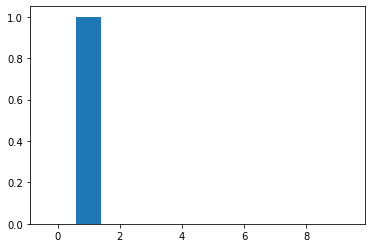

In [193]:
plot_bin_hist(bins, 10)

In [194]:
print(f'{d.pdf()}, {d.normalization():.8f}')
print("-"*110)
print(d.pdf() * d.normalization())

[22387.2, 15848.9, 11220.2, 7943.28, 5623.41, .. 11 skipped .., 89.1251, 63.0957, 44.6684, 31.6228, 22.3872], 0.00041378
--------------------------------------------------------------------------------------------------------------
[9.26336, 6.55795, 4.64268, 3.28676, 2.32685, .. 11 skipped .., 0.0368781, 0.0261077, 0.0184828, 0.0130848, 0.00926336]


In [195]:
center, low, high, _ = fractionalOctaves(1)

all_freq = np.concatenate((low, center, high))
all_freq = np.unique(np.sort(all_freq.round(decimals=10)))
all_freq_wav = np.flip(SOUND_SPEED / all_freq)
all_freq

array([   22.38721139,    31.6227766 ,    44.66835922,    63.09573445,
          89.12509381,   125.89254118,   177.827941  ,   251.18864315,
         354.81338923,   501.18723363,   707.94578438,  1000.        ,
        1412.53754462,  1995.26231497,  2818.38293126,  3981.07170554,
        5623.4132519 ,  7943.28234724, 11220.18454302, 15848.93192461,
       22387.21138568])

In [196]:
np.concatenate(([low[0]], high))

array([   22.38721139,    44.66835922,    89.12509381,   177.827941  ,
         354.81338923,   707.94578438,  1412.53754462,  2818.38293126,
        5623.4132519 , 11220.18454302, 22387.21138568])

In [197]:
from mitsuba.core import DiscreteDistribution

In [254]:
octave_freq = np.array([8, 16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000, 16000])
#octave_freq = np.array([8, 16, 31.5, 63, 125, 250, 500, 1000, 2000, 4000])

octave_wav = SOUND_SPEED / octave_freq

continous = IrregularContinuousDistribution(octave_freq, octave_wav )

In [253]:
uniform_samples = np.arange(1, len(octave_freq)) / (len(octave_freq))

print(uniform_samples)

distribution_samples = np.array([continous.sample(x) for x in uniform_samples])
#print(distribution_samples - octave_freq)

bins = fractionalOctaveBin(octave_freq, distribution_samples)
print(bins)

[0.07692308 0.15384615 0.23076923 0.30769231 0.38461538 0.46153846
 0.53846154 0.61538462 0.69230769 0.76923077 0.84615385 0.92307692]
[ 1  2  3  4  5  6  7  7  8  9 10 11]


In [246]:
continous.sample(0.91666667)

8528.4111328125

In [111]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def find_uniform(distr, value):
    x = np.linspace(0, 1, 1000)
    arr = [distr.sample(y) for y in x]
    idx =  find_nearest(arr, value)
    return x[idx]

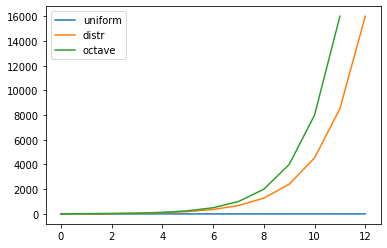

In [107]:
plt.plot(uniform_samples, label = 'uniform')
plt.plot(distribution_samples, label = 'distr')
plt.plot(octave_freq, label = 'octave')
plt.legend()

In [163]:
def sample_octave_freq(uniform, octave_freq):
    idx = int(np.ceil(uniform * (len(octave_freq) - 1)))
    return octave_freq[idx]

In [175]:
select = np.arange(len(octave_freq)) / len(octave_freq)

In [176]:
res = [sample_octave_freq(x, octave_freq) for x in select]
    

In [255]:
sample_octave_freq(0.08, octave_freq)

16.0

In [483]:
class IrregularDiscreteDistribution:
    def __init__(self, nodes, pmf):
        self._nodes = np.array(nodes)
        self._cdf = np.zeros(len(nodes))
        self._pmf = np.array(pmf)
        self._integral = np.sum(pmf)
        self.update()
        
    def update(self):
        integral = 0
        for i, x in enumerate(self._pmf):
            integral += x
            self._cdf[i] += integral
            
    def cdf_idx(self, uniform):
        return np.searchsorted(self.cdf_norm, uniform)
            
    def sample(self, uniform): 
        return self._nodes[self.cdf_idx(uniform)]
    
    def sample_pdf(self, uniform):
        idx = self.cdf_idx(uniform)
        return (self._nodes[idx], self.pmf_norm[idx])
    
    def eval_cdf(self, x):
        return self._cdf[self.cdf_idx(x)]
        
    def eval_pmf(self, x):
        return self._pmf[self.cdf_idx(x)]
    
    def eval_cdf_normalized(self, x):
        return self._cdf[self.cdf_idx(x)] / self._integral
    
    def eval_pmf_normalized(self, x):
        return self._pmf[self.cdf_idx(x)] / self._integral
    
    @property
    def cdf_norm(self):
        return self._cdf / self._integral
    
    @property
    def pmf_norm(self):
        return self._pmf / self._integral

In [490]:
x = np.linspace(0, 1, 1000)

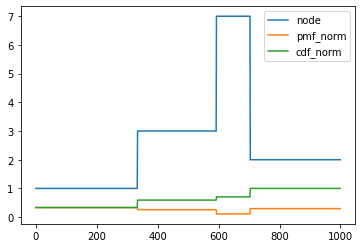

In [506]:
irrdiscr = IrregularDiscreteDistribution([1, 3, 7, 2], [9, 7, 3, 8])
node, pmf = irrdiscr.sample_pdf(x)
cdf = irrdiscr.eval_cdf_normalized(x)

plt.plot(node, label = 'node')
plt.plot(pmf, label = 'pmf_norm')
plt.plot(cdf, label = 'cdf_norm')
plt.legend()